<a href="https://colab.research.google.com/github/Mennatullah61/DEPI-Final-Project/blob/Machine-learning-Models/RFM_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [ ]:
rfm_df = pd.read_csv('/content/RFM_Analysis.csv')
rfm_df.head()

,customer_id,recency,frequency,monetary,R_rank,F_rank,M_rank,RFM_Score,segment,Cluster
0,1,8,11,9084.45,10,7,9,26,Best Customers,2
1,2,129,3,4149.07,2,1,3,6,Lost Customers,1
2,4,196,2,1047.72,1,1,1,3,Lost Customers,1
3,5,17,6,5903.20,8,4,6,18,Potential Loyalist,0
4,6,65,5,5931.69,4,3,6,13,At Risk,3


In [ ]:
rfm_scores_transactions = pd.read_csv('/content/rfm_scores_transactions.csv')
rfm_scores_transactions.columns

Index(['customer_id', 'name', 'age', 'gender',
       'past_3_years_bike_related_purchases', 'categorized_job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'postcode', 'state', 'property_valuation', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'recency', 'frequency',
       'monetary', 'R_rank', 'F_rank', 'M_rank', 'RFM_Score', 'segment',
       'Cluster'],
      dtype='object')

In [ ]:
churn_threshold = 180  # 6 months

rfm_scores_transactions['churn'] = rfm_scores_transactions['recency'].apply(lambda x: 1 if x > churn_threshold else 0)

In [ ]:
rfm_scores_transactions['churn']

,churn
0,0
1,0
2,0
3,0
4,0
...,...
19409,0
19410,0
19411,0
19412,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

object_cols = rfm_scores_transactions.select_dtypes(include=['object']).columns

le = LabelEncoder()

for col in object_cols:
  rfm_scores_transactions[col] = le.fit_transform(rfm_scores_transactions[col])


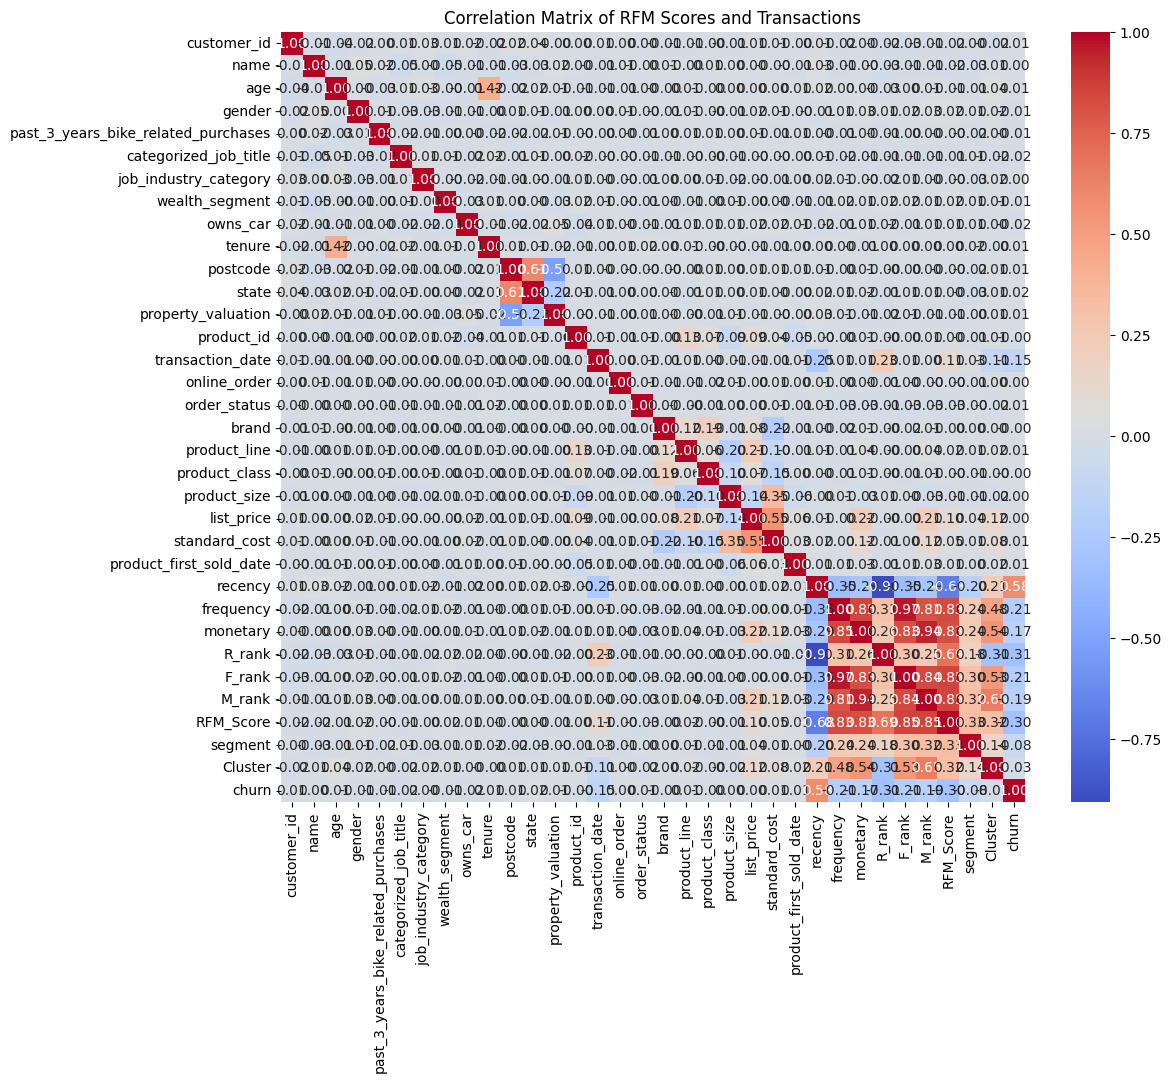

In [ ]:
heatmap_data = rfm_scores_transactions.select_dtypes(include=['number'])

correlation_matrix = heatmap_data.corr()

plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of RFM Scores and Transactions')
plt.show()

                                feature  importance
21                              recency    0.745557
24                            RFM_Score    0.088022
23                             monetary    0.029767
11                     transaction_date    0.027616
22                            frequency    0.024677
25                              segment    0.019232
0                                   age    0.010060
2   past_3_years_bike_related_purchases    0.008249
9                    property_valuation    0.005878
7                                tenure    0.005794


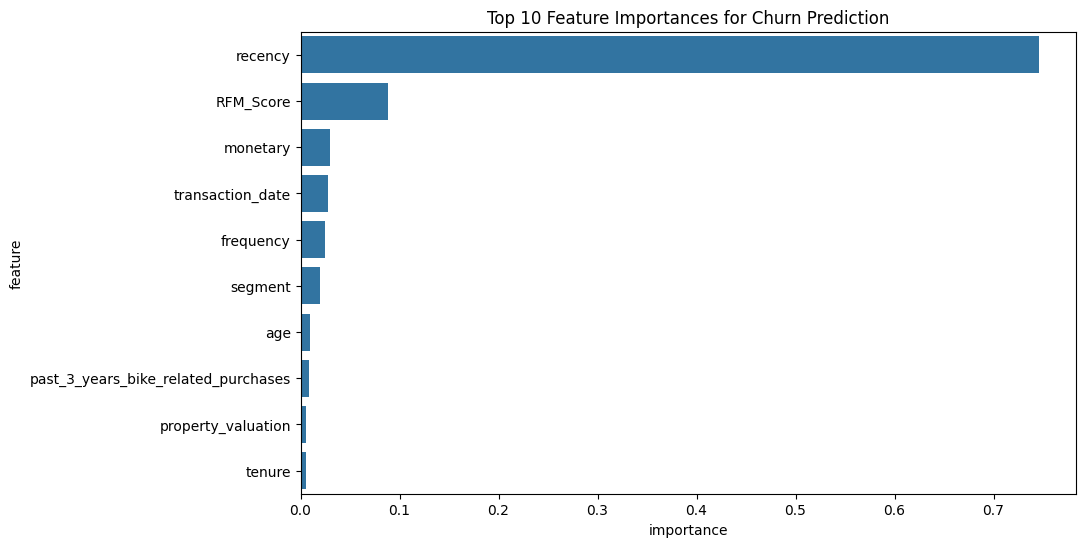

In [ ]:
# choose the most important features for churn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = rfm_scores_transactions.drop(['churn', 'R_rank', 'F_rank', 'M_rank', 'name', 'postcode', 'customer_id', 'Cluster'], axis=1)
y = rfm_scores_transactions['churn']

for col in X.select_dtypes(include=['datetime']):
    X[col] = X[col].astype(int) // 10**9

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

feature_importances = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)

print(feature_importances.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(10))
plt.title('Top 10 Feature Importances for Churn Prediction')
plt.show()

In [ ]:
important_features = ['recency', 'RFM_Score', 'frequency', 'monetary', 'transaction_date', 'segment', 'age', 'past_3_years_bike_related_purchases', 'property_valuation', 'tenure']
X = rfm_scores_transactions[important_features]
y = rfm_scores_transactions['churn']


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X.select_dtypes(include=['number']))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9997424671645635
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3761
           1       1.00      0.99      1.00       122

    accuracy                           1.00      3883
   macro avg       1.00      1.00      1.00      3883
weighted avg       1.00      1.00      1.00      3883

Confusion Matrix:
[[3761    0]
 [   1  121]]


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(kernel='linear')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9997424671645635
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3761
           1       1.00      0.99      1.00       122

    accuracy                           1.00      3883
   macro avg       1.00      1.00      1.00      3883
weighted avg       1.00      1.00      1.00      3883

Confusion Matrix:
[[3761    0]
 [   1  121]]


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3761
           1       1.00      1.00      1.00       122

    accuracy                           1.00      3883
   macro avg       1.00      1.00      1.00      3883
weighted avg       1.00      1.00      1.00      3883

Confusion Matrix:
[[3761    0]
 [   0  122]]
